### FERRAMENTAS DA QUALIDADE - GRÁFICO DE DISPERSÃO
<p>
<div style="text-align: justify;">
O gráfico de dispersão trata-se um gráfico bidimensional utilizado para verificar a relação entre duas variáveis quantitativas. O eixo horizontal geralmente representa a variável independente, enquanto o eixo vertical representa a variável dependente. Esse gráfico é útil para identificar padrões, outliers e o tipo de correlação entre as variáveis.
</div>
</p>

### DESCRIÇÃO DOS DADOS:

<p>
<div style="text-align: justify;">
Dados para previsão de qualidade em um processo de mineração. Esses dados são sobre uma planta de flotação que é um processo usado para concentrar o minério de ferro.
</div>
</p>

#### FONTE

<p>
<div style="text-align: justify;">
Processo de flotação industrial real (planta de mineração)
</div>
</p>

#### METODOLOGIA DE COLETA

<p>
<div style="text-align: justify;">
Sensores de hardware, como temperatura, pH, fluxo, densidade e todas as variáveis de processo contínuo, onde os dados foram coletados a cada 20s sem transformação (o conjunto de dados aqui mostra dados brutos). Variáveis de qualidade, como % do teor de sílica, % do teor de minério de ferro e assim por diante são medições de qualidade feitas por análise laboratorial. Uma amostra da polpa de minério de ferro é coletada no campo/chão de fábrica, a cada 15 minutos. Essas amostras são enviadas para o laboratório para análise. Então, a cada duas horas, o laboratório dá um feedback da análise de qualidade, ou seja, somente a cada duas horas você tem uma medição laboratorial/qualidade do fluxo de produto (concentrado de minério de ferro), o que lhe dá uma noção da qualidade do produto (concentrado de polpa de minério de ferro).
</div>
</p>
    
#### VARIÁVEIS

- <div style="text-align: justify;">1ª coluna: intervalo de datas (de março de 2017 a setembro de 2017). Algumas colunas foram amostradas a cada 20 segundos. Outros foram amostradas em uma base horária.</div>
    
- 2ª e 3ª colunas: medidas de qualidade da polpa de minério de ferro antes de ser alimentada na planta de flotação.
    
- 4ª até a 8ª coluna: variáveis mais importantes que impactam na qualidade do minério ao final do processo.
    
- 9ª até a 22ª coluna: dados do processo (nível e fluxo de ar dentro das colunas de flotação, que também impactam na qualidade do minério). 
    
- 23ª e 24ª colunas: medição final da qualidade da polpa de minério de ferro do laboratório.


**DISPONÍVEL EM:** <p><div style="text-align: justify;">https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process?resource=download&sort=votes
</div>
</p>

<p>
<div style="text-align: justify;">
Para uma atividade preditiva a meta seria prever a % de sílica no final do processo, que é o concentrado de minério de ferro e sua impureza (que é a % de sílica). Neste script, veremos apenas uma aplicação para o gráfico de dispersão.
</div>
</p>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados_mineracao = pd.read_csv('miningProcess-flotation-plant-database.csv')
df_mineracao = pd.DataFrame(dados_mineracao)
df_mineracao

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [3]:
# VERIFICAR O TIPO DE DADO DE CADA COLUNA
df_mineracao.dtypes

date                            object
% Iron Feed                     object
% Silica Feed                   object
Starch Flow                     object
Amina Flow                      object
Ore Pulp Flow                   object
Ore Pulp pH                     object
Ore Pulp Density                object
Flotation Column 01 Air Flow    object
Flotation Column 02 Air Flow    object
Flotation Column 03 Air Flow    object
Flotation Column 04 Air Flow    object
Flotation Column 05 Air Flow    object
Flotation Column 06 Air Flow    object
Flotation Column 07 Air Flow    object
Flotation Column 01 Level       object
Flotation Column 02 Level       object
Flotation Column 03 Level       object
Flotation Column 04 Level       object
Flotation Column 05 Level       object
Flotation Column 06 Level       object
Flotation Column 07 Level       object
% Iron Concentrate              object
% Silica Concentrate            object
dtype: object

In [4]:
# VERIFICAR SE EXISTE DADO FALTANTE
df_mineracao.isnull().any()

date                            False
% Iron Feed                     False
% Silica Feed                   False
Starch Flow                     False
Amina Flow                      False
Ore Pulp Flow                   False
Ore Pulp pH                     False
Ore Pulp Density                False
Flotation Column 01 Air Flow    False
Flotation Column 02 Air Flow    False
Flotation Column 03 Air Flow    False
Flotation Column 04 Air Flow    False
Flotation Column 05 Air Flow    False
Flotation Column 06 Air Flow    False
Flotation Column 07 Air Flow    False
Flotation Column 01 Level       False
Flotation Column 02 Level       False
Flotation Column 03 Level       False
Flotation Column 04 Level       False
Flotation Column 05 Level       False
Flotation Column 06 Level       False
Flotation Column 07 Level       False
% Iron Concentrate              False
% Silica Concentrate            False
dtype: bool

In [5]:
# SUBSTITUIR VÍRGULA POR PONTO
df_mineracao = df_mineracao.replace(',', '.', regex = True)
df_mineracao

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,...,313.695,392.16,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.7,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [6]:
# TRANSFORMAR COLUNA DE STRING PARA DATA E HORA
df_mineracao['date'] = pd.to_datetime(df_mineracao['date'], format = '%Y-%m-%d %H:%M:%S')

In [7]:
# TRANSFORMAR COLUNAS DE STRING PARA NUMÉRICA
df_mineracao.iloc[:,1:24] = df_mineracao.iloc[:,1:24].apply(pd.to_numeric)

In [8]:
# VERIFICAR O TIPO DE DADO DE CADA COLUNA
df_mineracao.dtypes

date                            datetime64[ns]
% Iron Feed                            float64
% Silica Feed                          float64
Starch Flow                            float64
Amina Flow                             float64
Ore Pulp Flow                          float64
Ore Pulp pH                            float64
Ore Pulp Density                       float64
Flotation Column 01 Air Flow           float64
Flotation Column 02 Air Flow           float64
Flotation Column 03 Air Flow           float64
Flotation Column 04 Air Flow           float64
Flotation Column 05 Air Flow           float64
Flotation Column 06 Air Flow           float64
Flotation Column 07 Air Flow           float64
Flotation Column 01 Level              float64
Flotation Column 02 Level              float64
Flotation Column 03 Level              float64
Flotation Column 04 Level              float64
Flotation Column 05 Level              float64
Flotation Column 06 Level              float64
Flotation Col

In [9]:
x = df_mineracao.iloc[:, 22]
y = df_mineracao.iloc[:, 23]

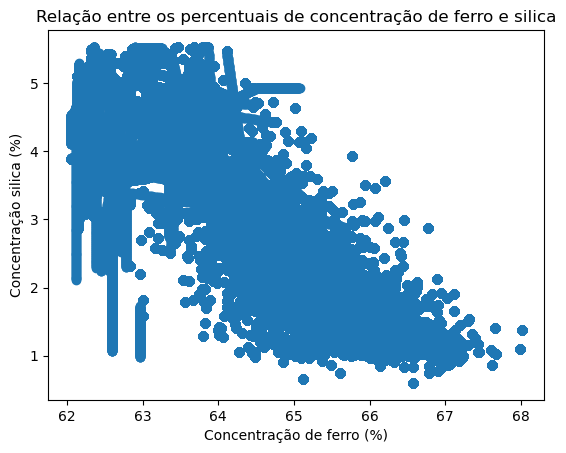

In [10]:
# PLOTAR O GRÁFICO DE DISPERSÃO
plt.scatter(x, y)
plt.title('Relação entre os percentuais de concentração de ferro e silica')
plt.xlabel('Concentração de ferro (%)')
plt.ylabel('Concentração silica (%)')

plt.show()

<div style="text-align: justify;">A relação entre as variáveis do processo mostra uma correlação negativa entre elas. É possível medir o grau da correlação através do cálculo do coeficiente de correlação Pearson ou Spearman.</div>